In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Q1: Load the CSV file as a dataframe
df = pd.read_csv('all-menu.csv')

# Show top 5 and Bottom 5 entries
print("Top 5 entries:")
print(df.head())
print("\nBottom 5 entries:")
print(df.tail())

# Check the number of columns and rows
print(f"\nNumber of rows: {df.shape[0]}, Number of columns: {df.shape[1]}")

# Find the unique and number of unique entries in each column
for col in df.columns:
    unique_vals = df[col].unique()
    print(f"\nUnique values in '{col}': {len(unique_vals)}")
    print(unique_vals[:5] if len(unique_vals) > 5 else unique_vals)

Top 5 entries:
         Beverage_category       Beverage      Beverage_prep  Calories  \
0                   Coffee  Brewed Coffee              Short         3   
1                   Coffee  Brewed Coffee               Tall         4   
2                   Coffee  Brewed Coffee             Grande         5   
3                   Coffee  Brewed Coffee              Venti         5   
4  Classic Espresso Drinks    Caffè Latte  Short Nonfat Milk        70   

   Total Fat (g)  Trans Fat (g)   Saturated Fat (g)   Sodium (mg)  \
0            0.1             0.0                0.0             0   
1            0.1             0.0                0.0             0   
2            0.1             0.0                0.0             0   
3            0.1             0.0                0.0             0   
4            0.1             0.1                0.0             5   

    Total Carbohydrates (g)   Cholesterol (mg)   Dietary Fibre (g)  \
0                          5                 0         

In [4]:
# Q2: Find out the data type for each column
print("\nData types:")
for col, dtype in df.dtypes.items():
    print(f"{col}: {dtype}")

#Markdown
'1. Category: Nominal (categorical) - It represents different categories without any inherent order.'
'2. Item: Nominal - It represents unique item names without any order.'
'3. Serving Size: Ordinal - It indicates the size of servings, which has an inherent order (e.g., Small < Medium < Large).'
'4. Calories: Continuous - Its a numerical value that can take any value within a range.'
'5. Calories from Fat: Continuous - Similar to Calories, its a numerical value within a range.'
'6. Total Fat: Continuous - A numerical value measured in grams.'
'7. Saturated Fat: Continuous - A numerical value measured in grams.'
'8. Trans Fat: Continuous - A numerical value measured in grams.'
'9. Cholesterol: Continuous - A numerical value measured in milligrams.'
'10. Sodium: Continuous - A numerical value measured in milligrams.'
'11. Carbohydrates: Continuous - A numerical value measured in grams.'
'12. Dietary Fiber: Continuous - A numerical value measured in grams.'
'13. Sugars: Continuous - A numerical value measured in grams.'
'14. Protein: Continuous - A numerical value measured in grams.'


Data types:
Beverage_category: object
Beverage: object
Beverage_prep: object
Calories: int64
 Total Fat (g): object
Trans Fat (g) : float64
Saturated Fat (g): float64
 Sodium (mg): int64
 Total Carbohydrates (g) : int64
Cholesterol (mg): int64
 Dietary Fibre (g): int64
 Sugars (g): int64
 Protein (g) : float64
Vitamin A (% DV) : object
Vitamin C (% DV): object
 Calcium (% DV) : object
Iron (% DV) : object
Caffeine (mg): object


'14. Protein: Continuous - A numerical value measured in grams.'

In [5]:
# Q3: Find out the null values in each column
print("\nNull values in each column:")
print(df.isna().sum())


if df.isna().any().any():
    df_no_null = df.dropna()
    print(f"\nDataFrame without null values shape: {df_no_null.shape}")
else:
    print("\nNo null values found.")

df_new = df.dropna()


Null values in each column:
Beverage_category            0
Beverage                     0
Beverage_prep                0
Calories                     0
 Total Fat (g)               0
Trans Fat (g)                0
Saturated Fat (g)            0
 Sodium (mg)                 0
 Total Carbohydrates (g)     0
Cholesterol (mg)             0
 Dietary Fibre (g)           0
 Sugars (g)                  0
 Protein (g)                 0
Vitamin A (% DV)             0
Vitamin C (% DV)             0
 Calcium (% DV)              0
Iron (% DV)                  0
Caffeine (mg)                1
dtype: int64

DataFrame without null values shape: (241, 18)


In [ ]:
# Q4: Rename at least 3 columns and drop at least 2 columns
df_new = df_new.rename(columns={
    'Calories': 'Energy_kcal',
    'Saturated Fat': 'Sat_Fat_g',
    'Dietary Fiber': 'Fiber_g'
})

df_new = df_new.drop(columns=['Trans Fat', 'Cholesterol'])

# Markdown: Why I chose to drop these columns
'I chose to drop Trans Fat and Cholesterol columns because:'
'1. Trans Fat: Many food items have 0g trans fat due to health concerns, making this column less informative.'
'2. Cholesterol: Not all food items contain cholesterol (e.g., plant-based foods), so this column might have many zero values.'

In [6]:
# Q5: Find statistical measures for numerical columns
numerical_cols = ['Energy_kcal', 'Calories from Fat', 'Total Fat', 'Sat_Fat_g', 'Sodium', 'Carbohydrates', 'Fiber_g', 'Sugars', 'Protein']

for col in numerical_cols:
    stats = df_new[col].describe()
    print(f"\nStatistics for {col}:")
    print(f"  Min: {stats['min']}")
    print(f"  Max: {stats['max']}")
    print(f"  Mean: {stats['mean']}")
    print(f"  Std: {stats['std']}")
    print(f"  Var: {df_new[col].var()}")
    print(f"  Sum: {df_new[col].sum()}")

KeyError: 'Energy_kcal'

In [7]:
# Q6: Random sampling
sample_size = int(0.25 * len(df_new))

# Sample 1
df_sample1 = df_new.sample(n=sample_size)
df_new = df_new[~df_new.index.isin(df_sample1.index)]

# Sample 2
df_sample2 = df_new.sample(n=sample_size)
df_new = df_new[~df_new.index.isin(df_sample2.index)]

# Sample 3
df_sample3 = df_new.sample(n=sample_size)
df_new = df_new[~df_new.index.isin(df_sample3.index)]

# Sample 4 (remaining data)
df_sample4 = df_new

print(f"\nSample sizes:")
print(f"  Sample 1: {len(df_sample1)}")
print(f"  Sample 2: {len(df_sample2)}")
print(f"  Sample 3: {len(df_sample3)}")
print(f"  Sample 4: {len(df_sample4)}")


Sample sizes:
  Sample 1: 60
  Sample 2: 60
  Sample 3: 60
  Sample 4: 61


KeyError: 'Energy_kcal'

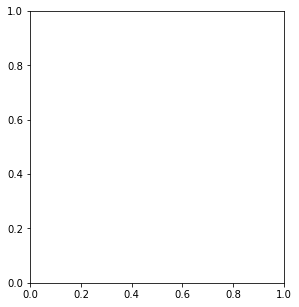

In [9]:

# Q7: Create joint Histogram and Box plot for two columns
cols_to_plot = ['Energy_kcal', 'Protein']

for col in cols_to_plot:
    plt.figure(figsize=(10, 5))
    
    # Histogram
    plt.subplot(1, 2, 1)
    plt.hist(df_new[col], bins=30, edgecolor='black')
    plt.title(f'Histogram - {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    
    # Box plot
    plt.subplot(1, 2, 2)
    plt.boxplot(df_new[col])
    plt.title(f'Box Plot - {col}')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

In [ ]:
#Sources referred to:
#https://pandas.pydata.org/docs/reference/frame.html
#https://matplotlib.org/stable/users/index.html
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html
#https://towardsdatascience.com/data-types-in-statistics-347e152e8b3e
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html